Task 1

Exploratory data analysis

- Find the age distribution of employees in company
- Explore attrition by age
- Explore data for Left employees
- Find out the distribution of employees by the education field
- Give a bar chart for the number of married and unmarried employees

Task 2
- Build up a logistic regression model to predict which employees are likely to attrite.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('IBM Attrition Data.csv')
print(df.shape)
df.head()

(1470, 13)


,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


# Exploratory Data Analysis

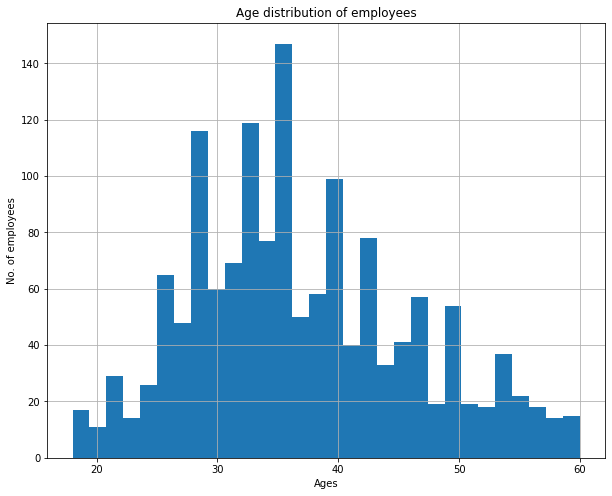

In [3]:
# Find the age distribution of employees in company
# df['Age'].min()

plt.figure(figsize=(10,8))
df['Age'].hist(bins=30)
plt.title('Age distribution of employees')
plt.xlabel('Ages')
plt.ylabel('No. of employees')
plt.show()

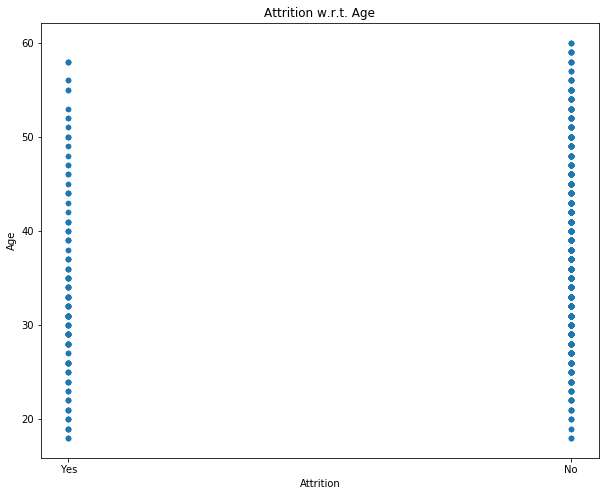

In [4]:
# Explore attrition by age

df.plot.scatter(x='Attrition',y='Age', figsize=(10,8))
plt.title('Attrition w.r.t. Age')
plt.show()

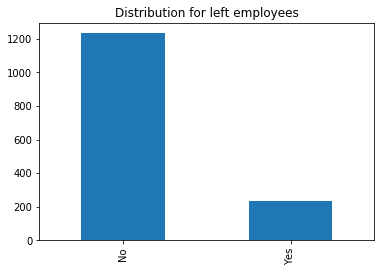

In [5]:
# Explore data for Left employees

df['Attrition'].value_counts().plot(kind='bar')
# or
# plt.hist(df['Attrition'], fig)

plt.title('Distribution for left employees')
plt.show()

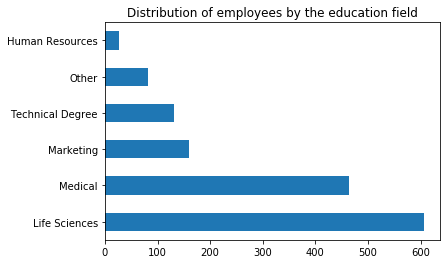

In [6]:
# Find out the distribution of employees by the education field

df['EducationField'].value_counts().plot(kind='barh')
plt.title('Distribution of employees by the education field')
plt.show()

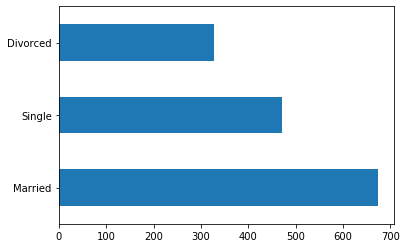

In [7]:
# Give a bar chart for the number of married and unmarried employees

df['MaritalStatus'].value_counts().plot(kind='barh')
plt.show()

# Model building

### Build up a logistic regression model to predict which employees are likely to attrite.

In [8]:
# Let's get data and target seperated

data = df.drop(['Attrition'], axis=1)
target = df['Attrition']

print(data.shape)
data.head()
# target.head()

(1470, 12)


,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [9]:
# Let's convert categorical variables to numerical variables

data_ = pd.get_dummies(data)
data_.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Department_Human Resources,...,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,2,2,4,5993,8,1,6,0,...,1,0,1,0,0,0,0,0,0,1
1,49,8,1,3,2,5130,1,3,10,0,...,0,0,1,0,0,0,0,0,1,0
2,37,2,2,4,3,2090,6,3,0,0,...,0,0,0,0,0,1,0,0,0,1
3,33,3,4,4,3,2909,1,3,8,0,...,0,0,1,0,0,0,0,0,1,0
4,27,2,1,1,2,3468,9,3,2,0,...,0,0,0,0,1,0,0,0,1,0


In [10]:
# converting target into numerics
def func(x):
    if x=='Yes':
        return 1
    else:
        return 0
    
target = target.apply(func)
target

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [11]:
# train-test-split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_,target,test_size=0.25)

In [12]:
x_train.head()
y_train.head()

145    0
773    0
375    0
731    1
333    0
Name: Attrition, dtype: int64

In [13]:
# Logistic Regrassion model building
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(x_train, y_train)

C:\Users\Ashwini Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [16]:
# Let's check the model performance

from sklearn.metrics import accuracy_score, confusion_matrix
acc = accuracy_score(y_test,model.predict(x_test))
cm = confusion_matrix(y_test,model.predict(x_test))

print('Accuracy: ', acc)
print('Confusion Matrix: \n',cm)

Accuracy:  0.845108695652174
Confusion Matrix: 
 [[311   0]
 [ 57   0]]
